# Membros:
Ana Clara Cavalcante 11797000

Bruna Bazaluk M Videira 9797002

Thales Gomes 9814265

Link do Drive: https://drive.google.com/drive/u/2/folders/0AFr5m3SYFqBxUk9PVA

Link do GitHub: https://github.com/brunabazaluk/visaoComp

## EP2.2: Normalização e análise da variação das classes

## Descrição do EP

Deve-se criar um JN que realize a normalização das imagens de cada classe do augmentedDataSet. Deve-se usar a equalização de histogramas como função inicial de normalização, gerando um normalizedDataset. As funções de análise de cada classe abaixo devem ser aplicadas ao originalGrayDataset, augmentedDataset e normalizedDataset. Assim, esse JN deve calcular e mostrar para cada dataset:

    - Protótipo médio de cada classe
    - Histograma médio de cada classe
    - Variância do histograma de cada classe




## Importando as libs

In [ ]:
from skimage import io
import os

import numpy as np
import functools
import math
import matplotlib.pyplot as plt

from skimage.exposure import equalize_hist
from skimage.transform import resize

# Conectar-se ao Drive
from google.colab import drive

## Funções

#### Auxiliares

In [ ]:
def add_suffix(base_name, suffix):  # Para transformar os nomes das imagens
    """Recebe o nome do arquivo com uma extensão e retorna o nome + sufixo + extensão
    Ex:
    base_name = 'foto123.jpg'
    suffix = '-nova'
    Retorna -> 'foto123-nova.jpg' """
    nome, ext = os.path.splitext(base_name)
    return nome + suffix + ext

In [ ]:
def gerar_histogramas(imagens):
        imgs_map = map(lambda img: resize(img.astype(np.uint8), (600,600), anti_aliasing=True), imagens)
        return np.array([hist for (hist,edges) in list(map(lambda x : np.histogram(x, bins=256), imgs_map))])

### Equalização de histograma

Função inicial de normalização utilizada para gerar o normalizedDataset

In [ ]:
#Funcao para gerar o normalizedDataset
def equalizacao(caminho_augmented_dataset, caminho_salvar):
    save_path_base = caminho_salvar

    for root, dirs, fotos in os.walk(caminho_augmented_dataset):
        for foto in fotos:
            img_path = os.path.join(caminho_augmented_dataset, foto)  # Ajusta o caminho
            # Processamento da imagem
            img = io.imread(img_path) # Lê a imagem (transforma em matriz)
            equalized_img = equalize_hist(img)
            # Salvamento
            novo_nome = add_suffix(foto, '-normalized')
            save_path = os.path.join(save_path_base, novo_nome)
            io.imsave(save_path, equalized_img)  # .astype(np.uint8) Salva a imagem normalizada

### Protótipo médio de cada classe

In [ ]:
def prototipo_medio(imagens):
    imgs_map = map(lambda img: resize(img.astype(np.uint8), (600,600), anti_aliasing=True), imagens)
    return functools.reduce(np.add, list(imgs_map)) / len(imagens)

### Histograma médio de cada classe

In [1]:
def histograma_medio(hist):
    return np.mean(hist, axis=0)

### Variância do histograma de cada classe

In [3]:
def histograma_variancia(hist):
    return hist.var(0)

## Executando nos datasets

- **Montagem do drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/Shareddrives/Visão Computacional 2021/'

Mounted at /content/drive


- **Definindo os datasets e classes a serem verificados:**

In [ ]:
pastas = {
    "Imagens Originais": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Originais",
    "Imagens Cinza": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza",
    "Imagens Gradiente": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Gradiente",
    "Imagens Exp": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp",
    "Imagens Log": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Log",
    "Imagens Média": "/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Media"
}

classes = ["palheta", "vela", "pregador", "caneta", "faca", "maca", "tesoura", "lego", "pente", "mascara"]

Gerando as pastas com imagens normalizadas

In [ ]:
pastas_normalizadas = {}

for p in pastas:
    if "Originais" in p:
    continue

    caminho_augmented_dataset = pastas[p]
    caminho_salvar = caminho_augmented_dataset + "_Normalizadas"

    if not os.path.exists(caminho_salvar):
    os.mkdir(caminho_salvar)

    equalizacao(caminho_augmented_dataset, caminho_salvar)

    pastas_normalizadas[p + " Normalizadas"] = caminho_salvar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: /content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp_Normalizadas/nf_lego1_f2-cinza-exp-normalized.jpg is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: /content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp_Normalizadas/nf_lego6_f2-cinza-exp-normalized.jpg is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: /content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp_Normalizadas/nf_lego4_f2-cinza-exp-normalized.jpg is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: /content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp_Normalizadas/nf_lego7_f2-cinza-exp-normalized.jpg is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: /content/drive/Shareddrives/Visão Computac

In [ ]:
pastas = {**pastas, **pastas_normalizadas}

Todas as pastas a passarem pelas funções de análise:

In [ ]:
pastas

{'Imagens Cinza': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza',
 'Imagens Cinza Normalizadas': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza_Normalizadas',
 'Imagens Exp': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp',
 'Imagens Exp Normalizadas': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Exp_Normalizadas',
 'Imagens Gradiente': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Gradiente',
 'Imagens Gradiente Normalizadas': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Gradiente_Normalizadas',
 'Imagens Log': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Log',
 'Imagens Log Normalizadas': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Log_Normalizadas',
 'Imagens Média': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Media',
 'Imagens Média Normalizadas': '/content/drive/Shareddrives/Visão Computacional 2021/Imagens_Media_Norma

- **Exibir os plots:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

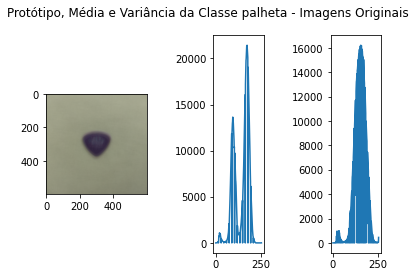

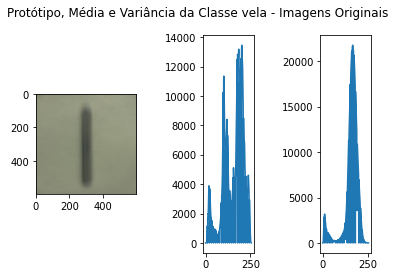

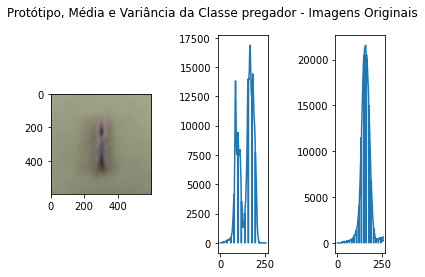

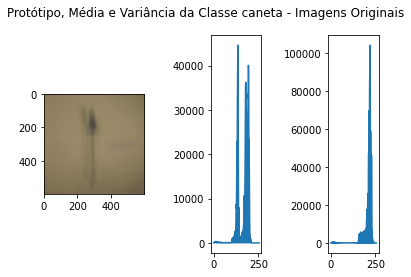

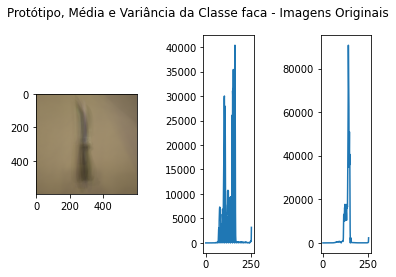

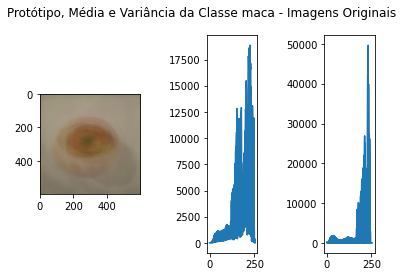

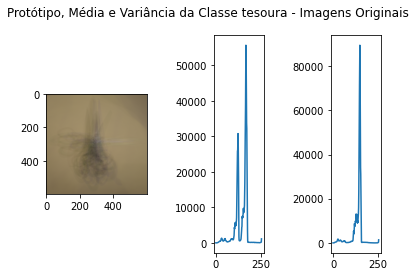

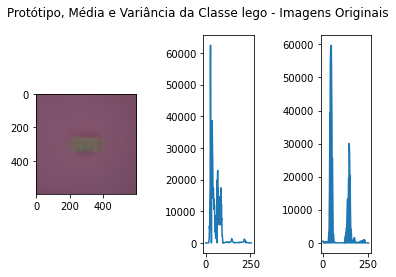

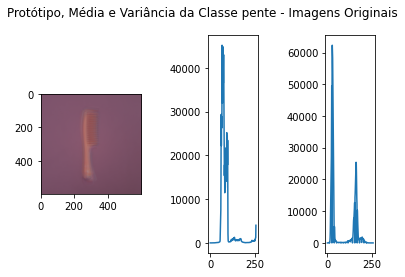

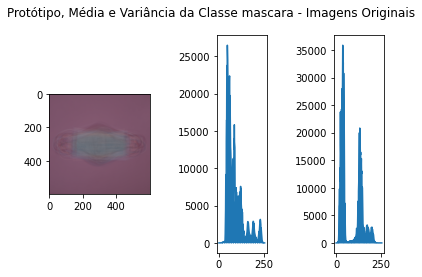

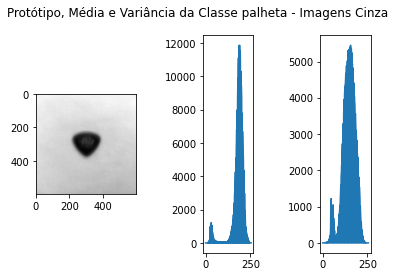

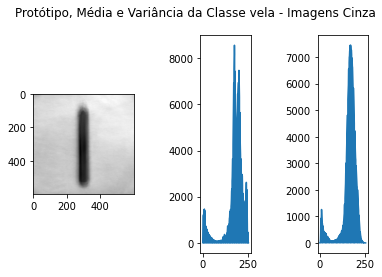

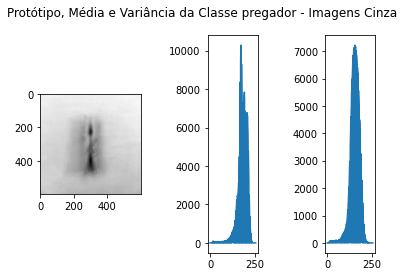

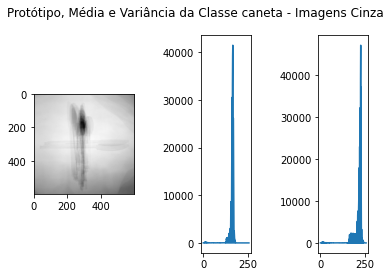

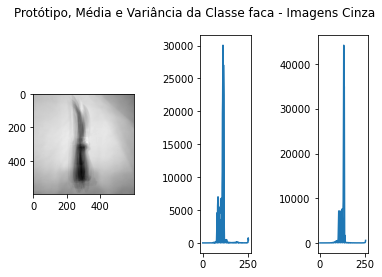

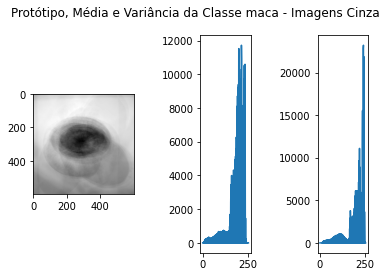

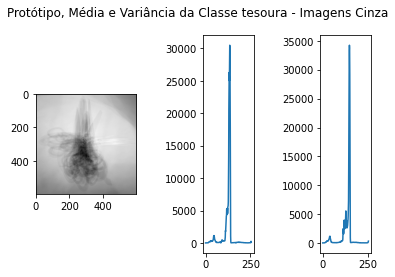

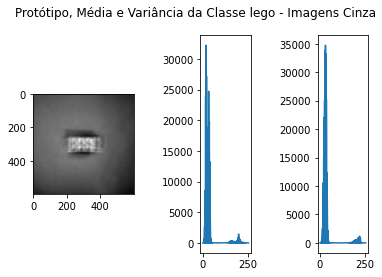

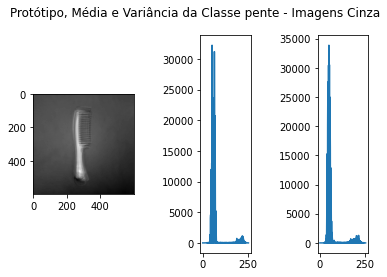

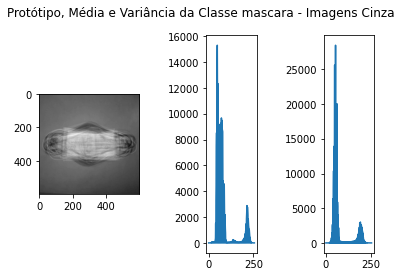

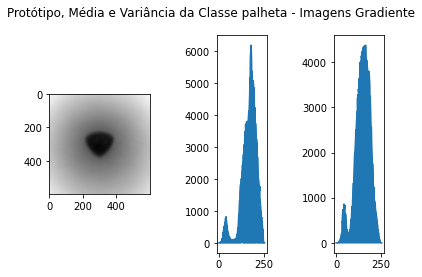

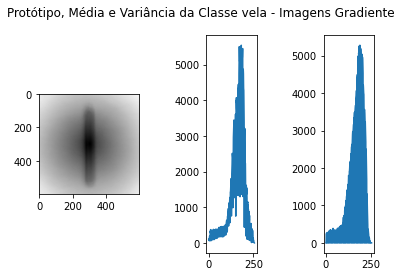

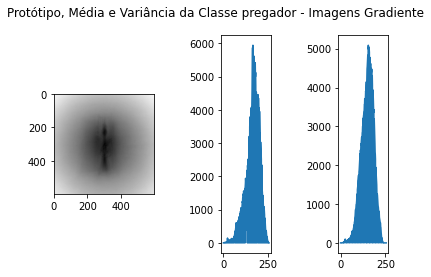

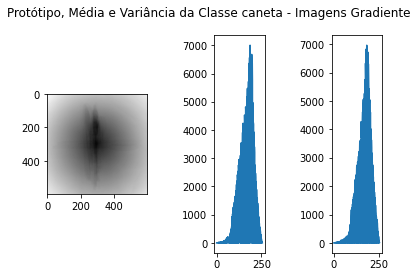

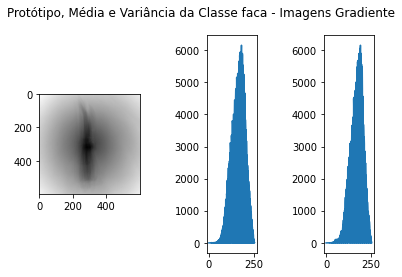

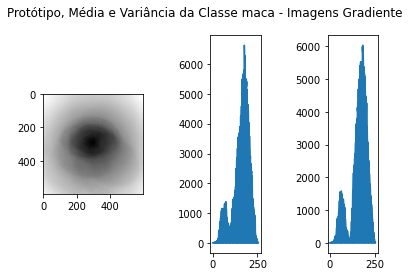

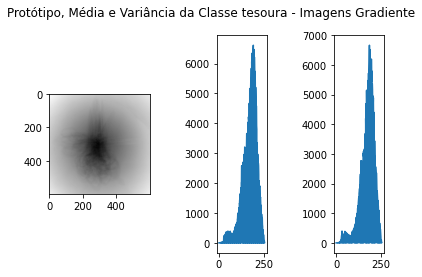

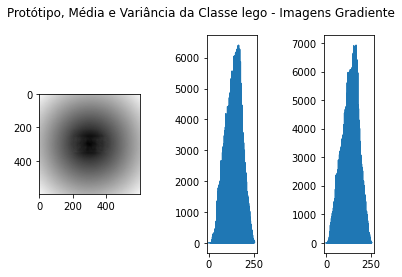

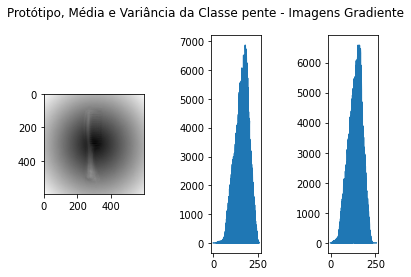

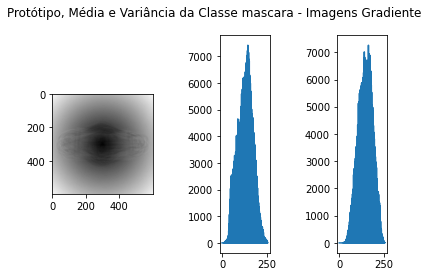

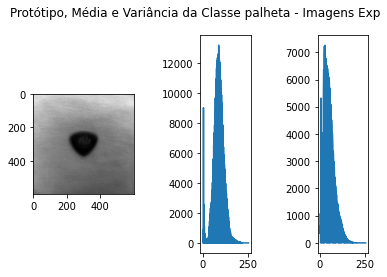

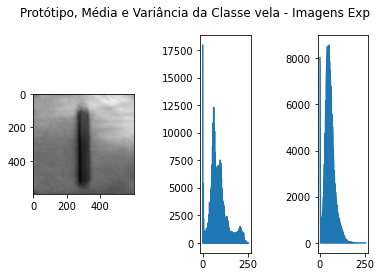

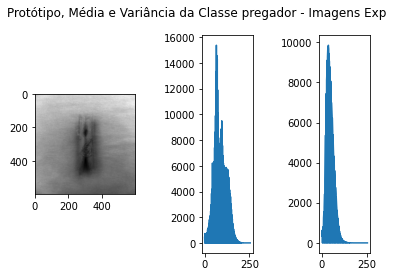

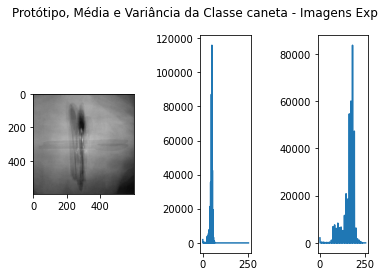

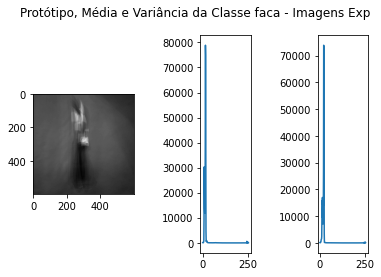

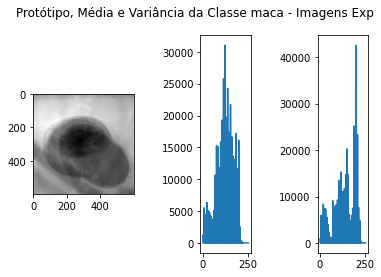

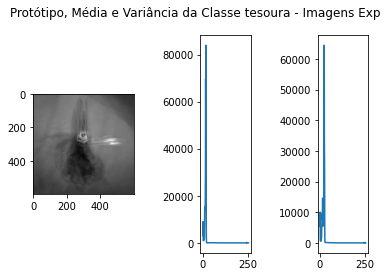

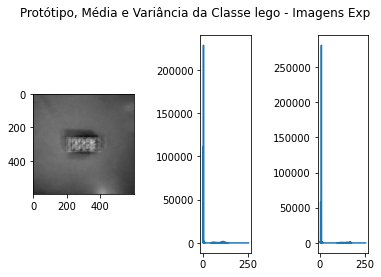

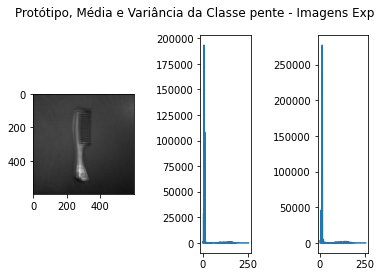

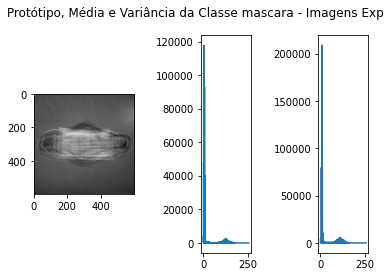

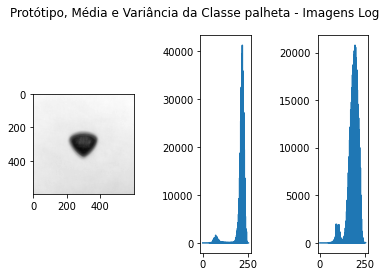

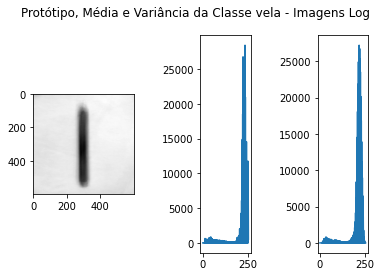

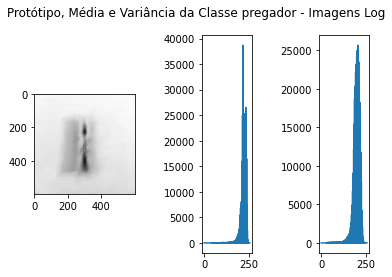

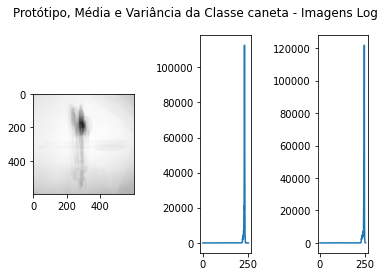

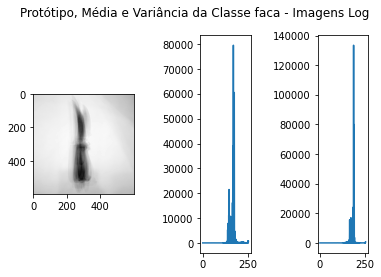

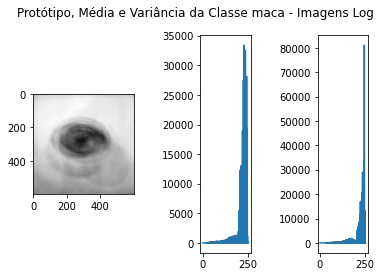

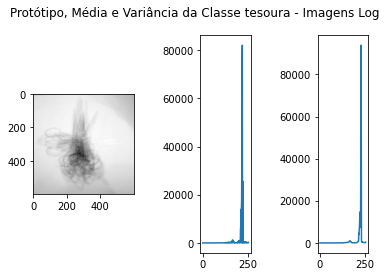

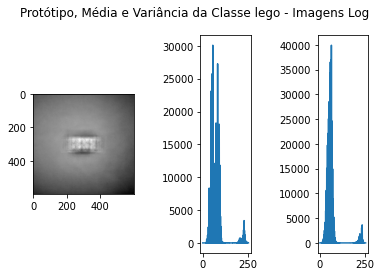

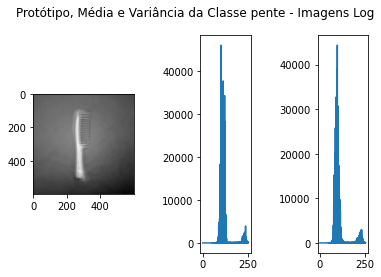

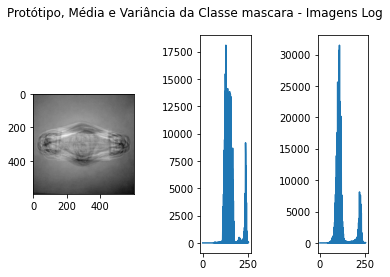

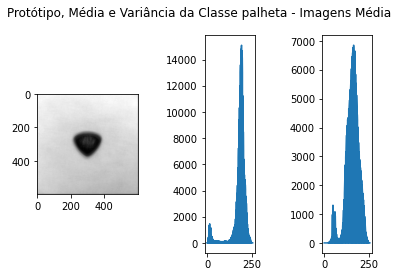

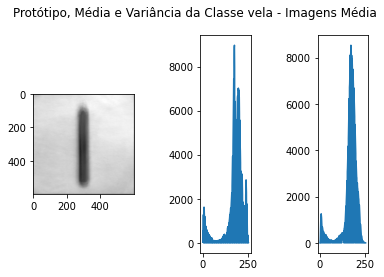

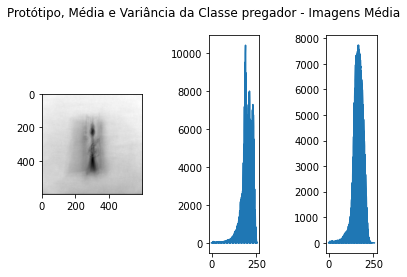

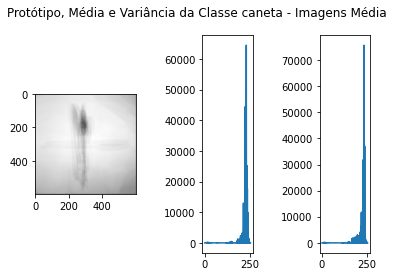

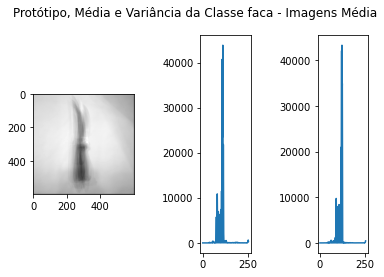

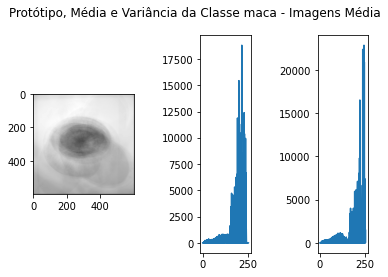

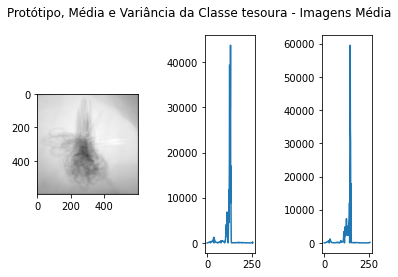

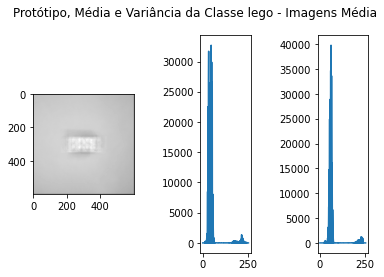

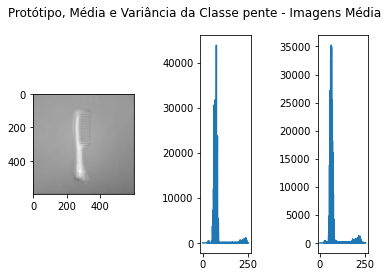

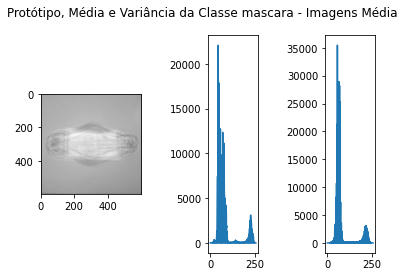

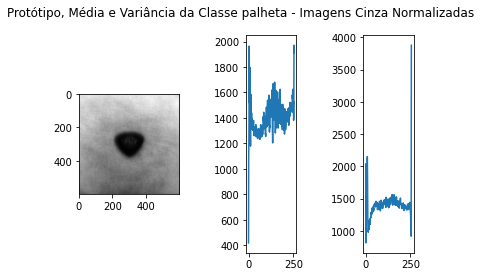

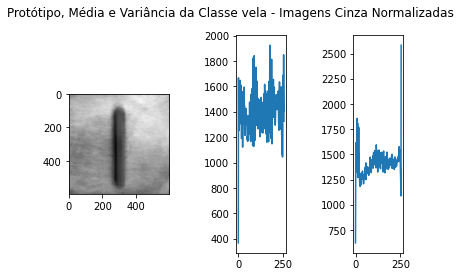

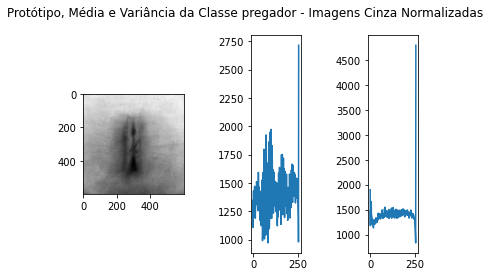

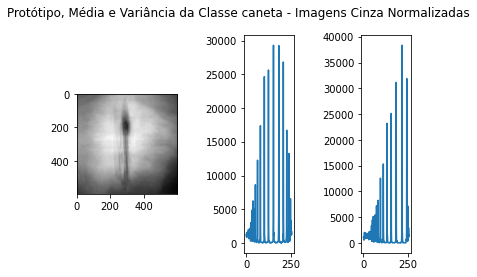

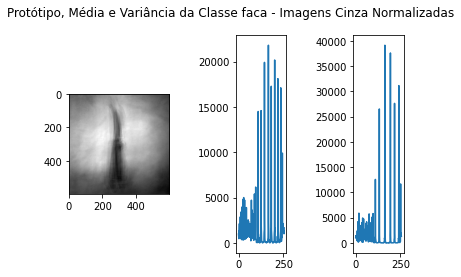

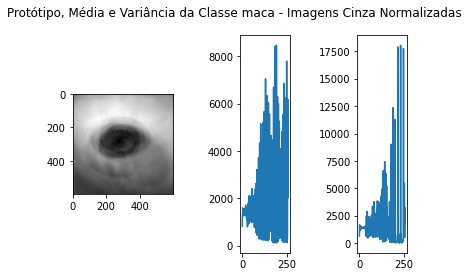

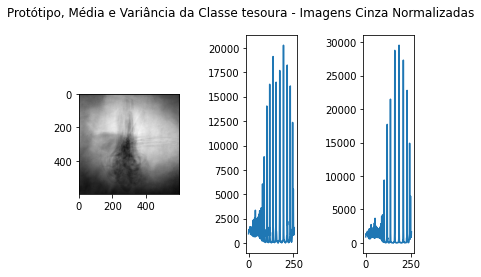

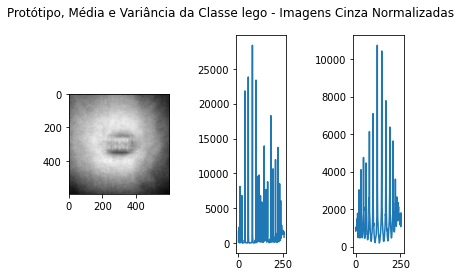

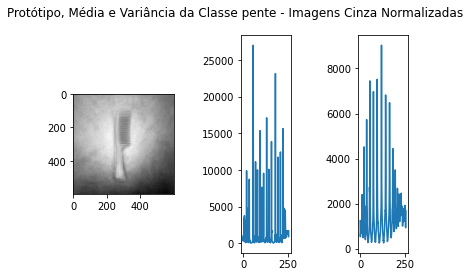

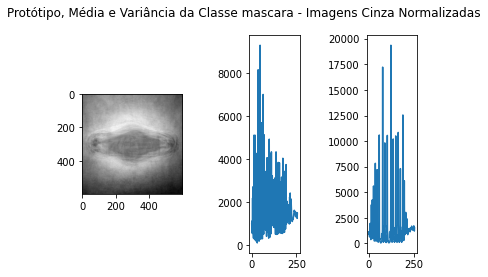

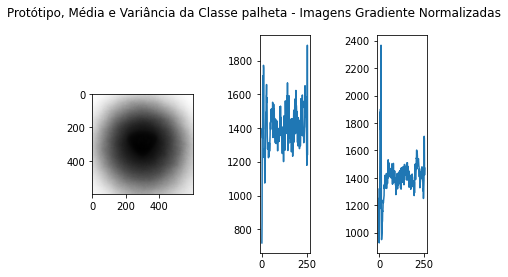

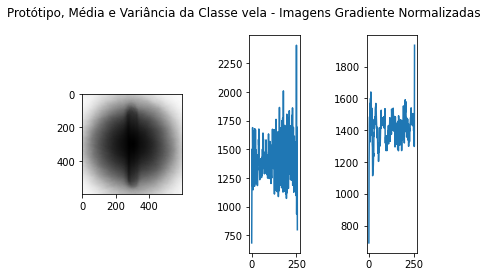

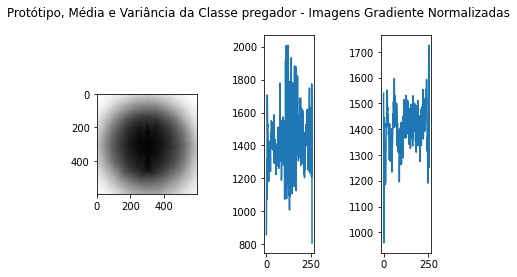

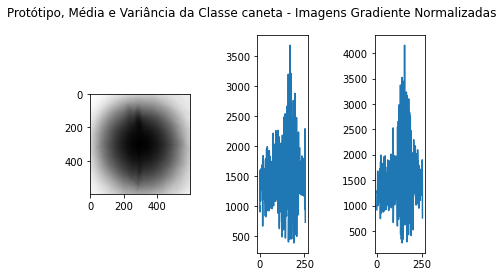

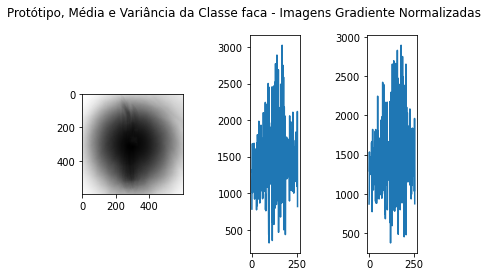

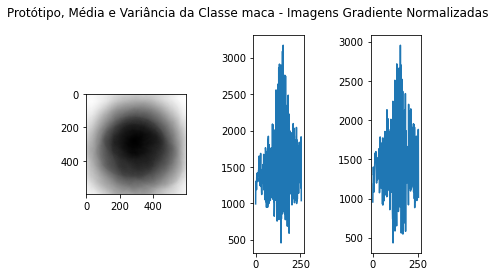

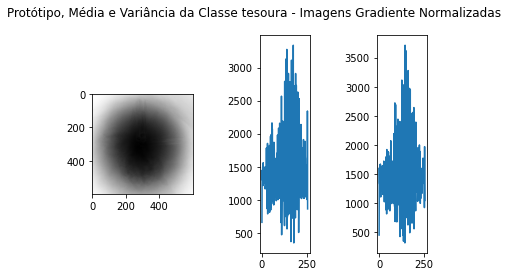

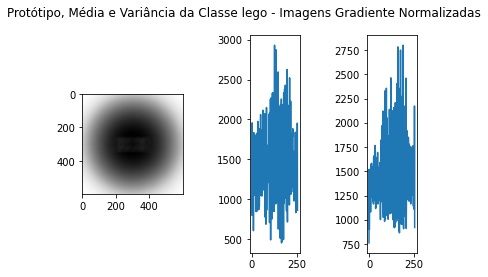

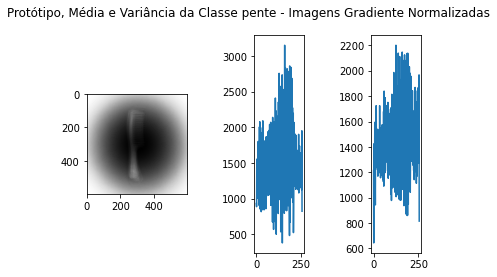

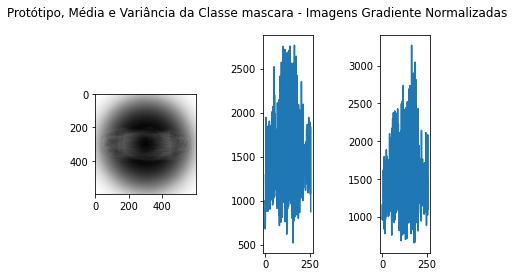

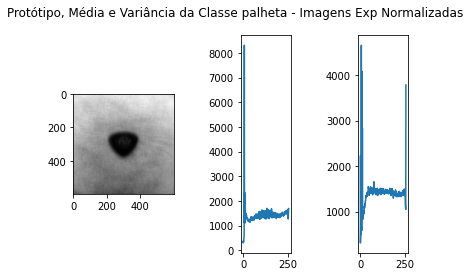

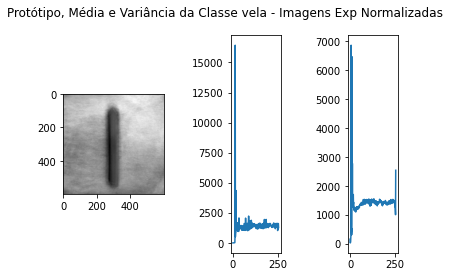

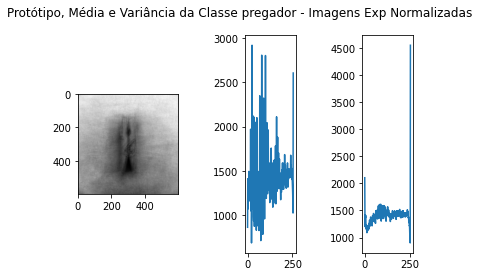

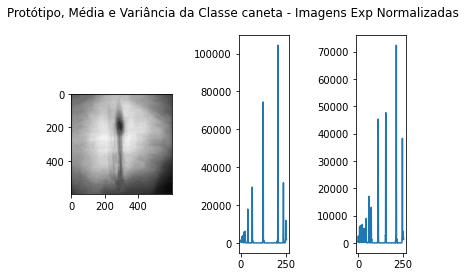

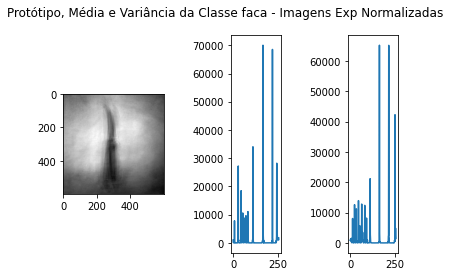

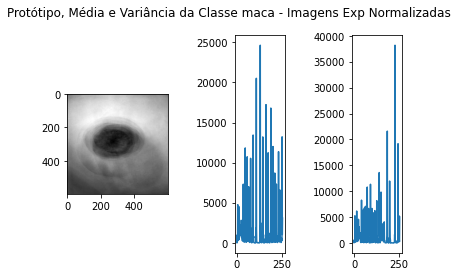

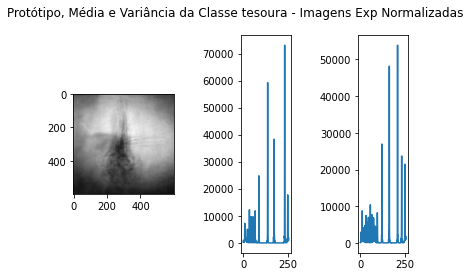

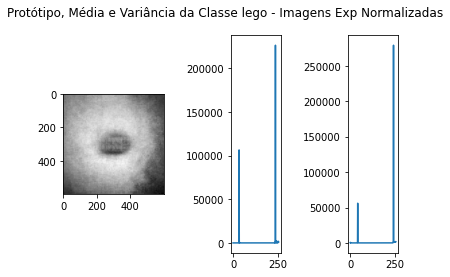

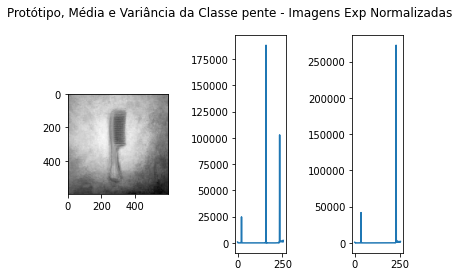

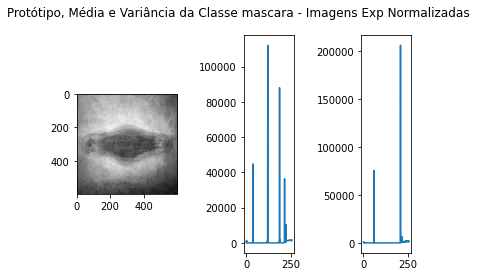

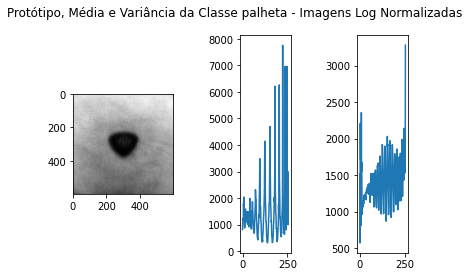

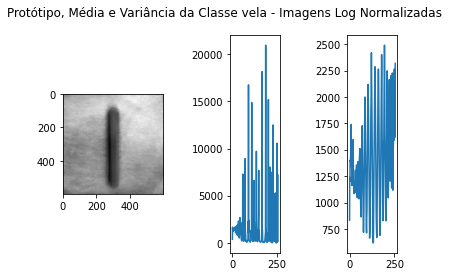

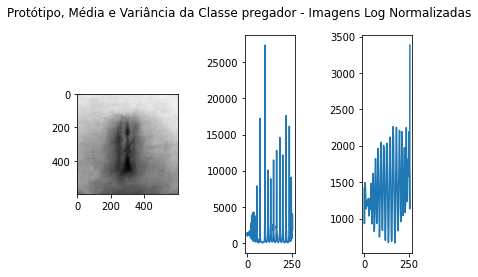

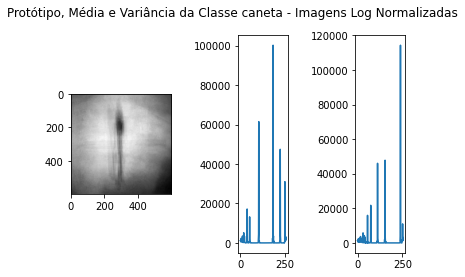

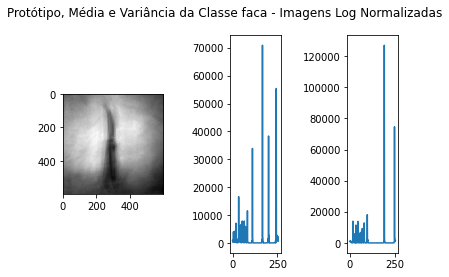

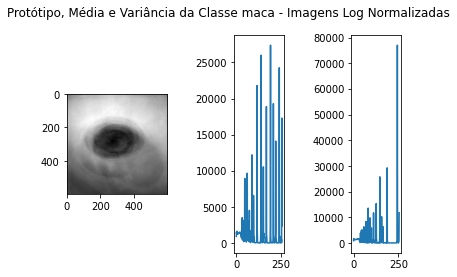

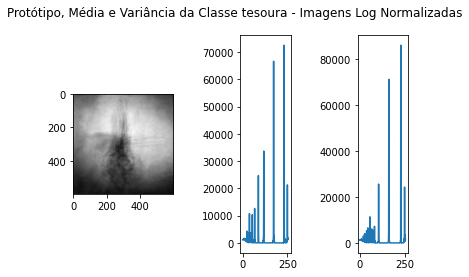

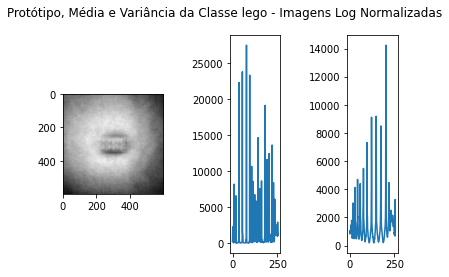

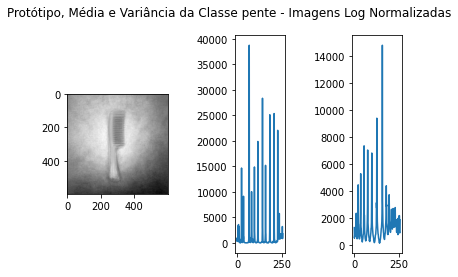

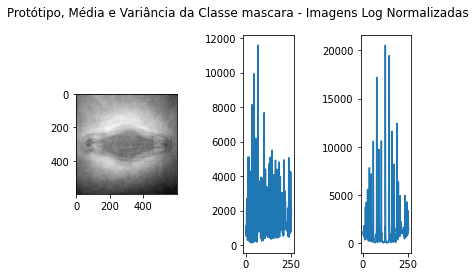

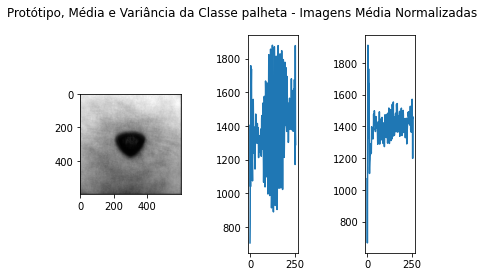

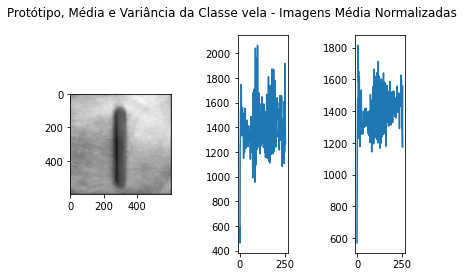

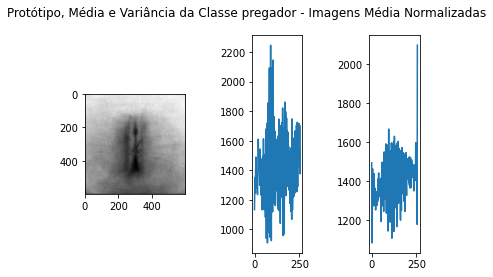

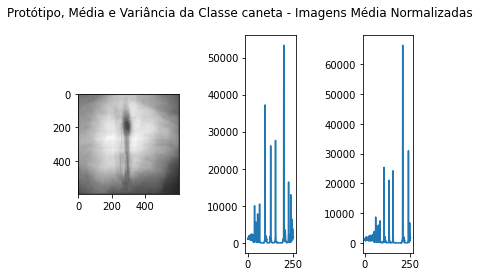

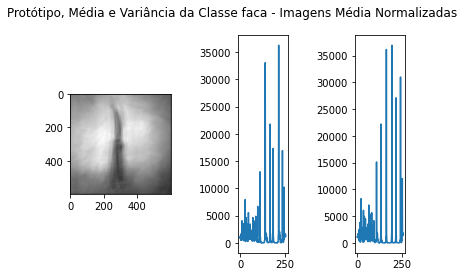

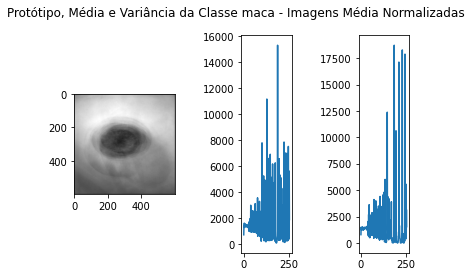

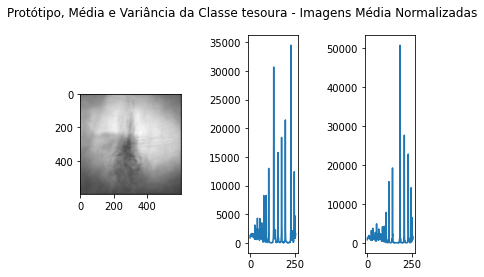

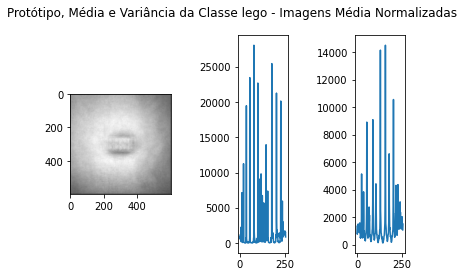

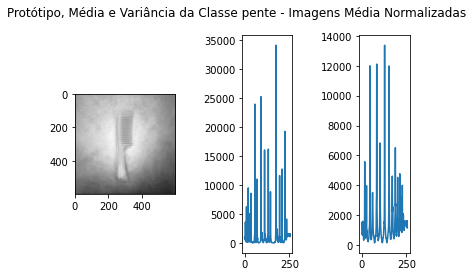

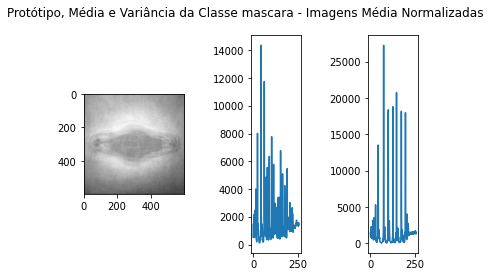

In [ ]:
for titulo_pasta, pasta in pastas.items():
    os.chdir(pasta)

    for classe in classes:    
        imgs_classe = io.imread_collection("*"+classe+"*.jpg")

        lista = gerar_histogramas(imgs_classe) 
        figura, (a1, a2, a3) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 1, 1]}) 
        figura.suptitle('Protótipo, Média e Variância da Classe ' + classe + " - "+ titulo_pasta)
        plt.subplots_adjust(wspace=1)
        a1.imshow(prototipo_medio(imgs_classe), cmap='gray')
        a2.plot(histograma_medio(lista))
        a3.plot(histograma_variancia(lista))